# Ejercicio 7

En el circuito de la figura, en t = 0 el interruptor cambia de la posición b a la a. Calcular:

a) $i(t)$ 

b) $v_1(t)$ 

c) $v2(t)$ 

d) La energía almacenada en el condensador $C_1$ en $t = 0$

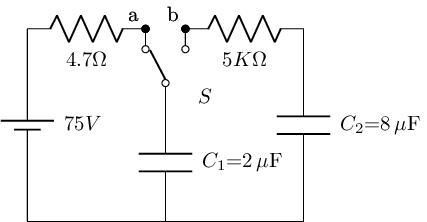

In [10]:
#
import lcapy as ly

c1=ly.Circuit()
c1.add("""
BAT _1 _0; down=1.6, kind=cell1,  l={$75V$}
R1 _1 a ; right, l={$4.7\Omega$}
SW _3 a b spdt; up, l={$S$}
C1 _3 _0b 2e-6; down, 
W1 _0b _0; left
R2  b _2b; right, l={$5K \Omega$}
C2 _2b _4c 8e-6; down,  
W9= _4c _0b;left
""")

c1.draw()

Mientras el interruptor se encuentra conectado en el contacto $a$ sabemos que la sección izquierda del circuito se encuentra en régimen permanente. Esto significa que el capacitor se comporta como un circuito abierto y su tensión es $V_0=75V$.

Al conmutar el interruptor en el momento $t=0$ comienza el transitorio. 

Planteamos la ley de Kirchhoff de las tensiones:

$-v_{c1}+v_{R}+v_{c2}=0$

 $\frac{1}{C1}\int i(t) dt+i(t)R+ \frac{1}{C2}\int i(t) dt=0$ (el cambio de signo del primer terérmino se debe a la convención de signos)
 
 Y derivando respecto del tiempo:
 
  $\frac{1}{C1} i(t)+\frac{di(t)}{dt}R+ \frac{1}{C2} i(t)=0$
  
  Agrupando:
  
  $(\frac{1}{C1}+\frac{1}{C2})i(t)+\frac{di(t)}{dt}R=0$
 
 La solución a esta ecuación diferencial tiene la forma:
 
$i(t)=Ae^{Dt}+B$  $(1)$

Y para obtener D podemos utilizar por ejemplo el método del operador diferencial:

  $(\frac{1}{C1}+\frac{1}{C2})+DR=0$
  
  Y por lo tanto $D=\frac{-1}{\frac{C_1 \times C2}{C1+C2}R}=-125\frac{1}{s}$.
  
Podemos saber que la constante B va a valer $0$ ya que para $t=\infty$ ambos capacitores serán un circuito abierto por lo que la corriente en estado estacionario será $i(\infty)=0$.

Para calcular la constante $A$ denbemos dibujar el circuito para $t=0$


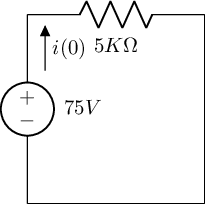

In [10]:
#
import lcapy as ly

c3=ly.Circuit()
c3.add("""

V  _3 _0b  4; down=1.6, l={$75V$}, f<^={$i(0)$}
R  _3 _2b; right=1.5,  l={$5K \Omega$}
W8= _2b _4d; down
W9= _4d _0b;left
""")

c3.draw()

Vemos en el circuito que $i(0)=15mA$ y analizando la ecuación $(1)$ $i(0)=A=15mA$ (ya que observamos previamente que $B=0$)


Para obtener la tensión $v_{C1}(t)$, utilizamos la relación Volt-Ampere del capacitor:

$v_{C1}(t)=-\frac{1}{C1}\int i(t) dt=- \frac{1}{2\mu F}\int 15mA\times e^{-125t} dt$ (el signo menos es debido a que el sentido de la corriente es opuesto la polaridad del elemento según la convensión de signos)

$v_{C1}(t)=60e^{-125t}V+C$

Ahora debemos encontrar C analizando nuevamente el circuito para $t=0$

$v_{C1}(0)=75V= 60e^{0}V+C$

C=15V

$v_{C1}(t)=60e^{-125t}V+15V$

Para calcular $v_{C2}$ podemos tamar el mismo camino o simplemente calcular a partir de la ley de las tensiones de Kirchhoff 

$v_{C2}(t)=v_{C1}(t)-i(t)R$